# Logistic Regression applied on MNIST dataset.

A logistic regression learning algorithm example using TensorFlow library.
This example is using the MNIST database of handwritten digits.

Author: ALIMOUSSA Mohamed

In [8]:
import sys
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import input_data

MNIST = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
# Define parameters for linear model
learning_rate = 0.01
batch_size = 128 #Nombre of images 
n_epochs = 25

In [10]:
# Create placeholders
X = tf.placeholder(tf.float32, [batch_size, 784], name="image")
Y = tf.placeholder(tf.float32, [batch_size, 10], name="label")

# Create weights and bias
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name="weights")
b = tf.Variable(tf.zeros([1,10]), name='bias')

In [11]:
# calculate scores
logits = tf.matmul(X, w) + b

# Entropy cost function and loss
entropy = tf.square(logits - Y )
loss = tf.reduce_mean(entropy)

# Define optimizer(logits = yPredbyNN, labels=Y)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

We define our 2 lists :

    - Loss_history : to stock the loss functon for each iteration of training so we will have a list containing        n_epochs values of loss function.
    - acc_history : store the accuracy for each iteration of training

In [12]:
loss_history = []
acc_history = []
init = tf.global_variables_initializer()

In [13]:
with tf.Session() as sess:
    sess.run(init)
    n_batches = int(MNIST.train.num_examples/batch_size)
    print(n_batches)
    time.sleep(20)
    for i in range(n_epochs):
        for _ in range(n_batches):
            #the function train.next_batch(n) we return n traing images with there labels 
            X_batch, Y_batch = MNIST.train.next_batch(batch_size)
            #we run our optimizer defined before to optimiser our loss function
            _, loss_value = sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch})
        loss_history.append(loss_value)
        
        # Check validation accuracy    
        n_v_batches = int(MNIST.validation.num_examples/batch_size)
        total_correct_preds = 0
        for j in range(n_v_batches):
            X_batch, Y_batch = MNIST.validation.next_batch(batch_size)
            _, loss_batch, logits_batch = sess.run([optimizer, loss, logits], feed_dict={X: X_batch, Y:Y_batch})
            preds = tf.nn.softmax(logits_batch)
            correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
            accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
            total_correct_preds += sess.run(accuracy)
        validation_accuracy = total_correct_preds/MNIST.validation.num_examples
        acc_history.append(validation_accuracy)


    # Test the model
    n_batches = int(MNIST.test.num_examples/batch_size)
    total_correct_preds = 0
    for i in range(n_batches):
        X_batch, Y_batch = MNIST.test.next_batch(batch_size)
        logits_batch = sess.run(logits, feed_dict={X: X_batch, Y:Y_batch})
        preds = tf.nn.softmax(logits_batch)
        correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
        accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
        total_correct_preds += sess.run(accuracy)
        
    print "Test accuracy is {0}".format(total_correct_preds/MNIST.test.num_examples)


429
Test accuracy is 0.8592


[0.050003111, 0.044599295, 0.048232429, 0.046153825, 0.041235734, 0.038786132, 0.039353233, 0.043021213, 0.037033863, 0.04257945, 0.043287665, 0.040440347, 0.042378165, 0.037021615, 0.036876492, 0.041232012, 0.040709108, 0.039366826, 0.038163565, 0.041349955, 0.04369634, 0.041546218, 0.03906218, 0.043489419, 0.034490455]


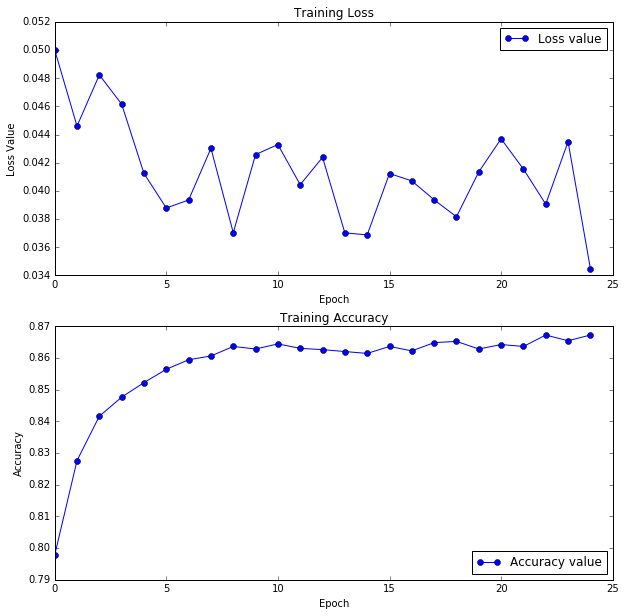

In [14]:
print(loss_history)
plt.subplot(2,1,1)
plt.plot(loss_history, '-o', label='Loss value')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend(ncol=2, loc='upper right')
plt.subplot(2,1,2)
plt.plot(acc_history, '-o', label='Accuracy value')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')
plt.gcf().set_size_inches(10, 10)
plt.show()